## Final Project Submission

Please fill out:
* Student name: Charlotte Basch
* Student pace: self paced / part time / <strong> full time </strong>
* Scheduled project review date/time: 
* Instructor name: James Irving 
* Blog post URL:


# Introduction

# Data Cleaning

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.metrics import r2_score
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

C:\Users\charlotte\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#import data
data = pd.read_csv("kc_house_data.csv")
display(data.head())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,nan,0.000,3,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.0,1933,nan,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [3]:
#View the data types of each column and number of rows and columns in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
#Look for any suspicious values and count the number of unique
#values for each column
for col in data.columns:
    val_counts = data[col].value_counts()
    index_list = []
    value_list = []
    print(f"Number of unique {col} values: {data[col].nunique()}")
    for index, value in val_counts.items():
        if value > 1:
            index_list.append(index)
            value_list.append(value)
    df = pd.DataFrame({col: index_list, "count": value_list})
    df = df.sort_values(by=["count"], ascending=False)
    display(df.head())

Number of unique id values: 21420


,id,count
0,795000620,3
1,1825069031,2
112,643300040,2
113,9238500040,2
114,3935900232,2


Number of unique date values: 372


,date,count
0,6/23/2014,142
2,6/26/2014,131
1,6/25/2014,131
3,7/8/2014,127
4,4/27/2015,126


Number of unique price values: 3622


,price,count
0,350000.000,172
1,450000.000,172
2,550000.000,159
3,500000.000,152
4,425000.000,150


Number of unique bedrooms values: 12


,bedrooms,count
0,3,9824
1,4,6882
2,2,2760
3,5,1601
4,6,272


Number of unique bathrooms values: 29


,bathrooms,count
0,2.500,5377
1,1.000,3851
2,1.750,3048
3,2.250,2047
4,2.000,1930


Number of unique sqft_living values: 1034


,sqft_living,count
0,1300,138
1,1400,135
2,1440,133
5,1800,129
3,1660,129


Number of unique sqft_lot values: 9776


,sqft_lot,count
0,5000,358
1,6000,290
2,4000,251
3,7200,220
4,7500,119


Number of unique floors values: 6


,floors,count
0,1.000,10673
1,2.000,8235
2,1.500,1910
3,3.000,611
4,2.500,161


Number of unique waterfront values: 2


,waterfront,count
0,0.000,19075
1,1.000,146


Number of unique view values: 5


,view,count
0,0.000,19422
1,2.000,957
2,3.000,508
3,1.000,330
4,4.000,317


Number of unique condition values: 5


,condition,count
0,3,14020
1,4,5677
2,5,1701
3,2,170
4,1,29


Number of unique grade values: 11


,grade,count
0,7,8974
1,8,6065
2,9,2615
3,6,2038
4,10,1134


Number of unique sqft_above values: 942


,sqft_above,count
0,1300,212
1,1010,210
2,1200,206
3,1220,192
4,1140,184


Number of unique sqft_basement values: 304


,sqft_basement,count
0,0.0,12826
1,?,454
2,600.0,217
3,500.0,209
4,700.0,208


Number of unique yr_built values: 116


,yr_built,count
0,2014,559
1,2006,453
2,2005,450
3,2004,433
4,2003,420


Number of unique yr_renovated values: 70


,yr_renovated,count
0,0.000,17011
1,2014.000,73
2,2003.000,31
3,2013.000,31
4,2007.000,30


Number of unique zipcode values: 70


,zipcode,count
0,98103,602
1,98038,589
2,98115,583
3,98052,574
4,98117,553


Number of unique lat values: 5033


,lat,count
0,47.662,17
2,47.532,17
3,47.685,17
1,47.549,17
4,47.671,16


Number of unique long values: 751


,long,count
0,-122.290,115
1,-122.300,111
2,-122.362,104
3,-122.291,100
4,-122.372,99


Number of unique sqft_living15 values: 777


,sqft_living15,count
0,1540,197
1,1440,195
2,1560,192
3,1500,180
4,1460,169


Number of unique sqft_lot15 values: 8682


,sqft_lot15,count
0,5000,427
1,4000,356
2,6000,288
3,7200,210
4,4800,145


In [5]:
#Given that the sqft_basement variable has a ? in its data, replace it with null values
data = data.replace("?", np.nan)
#Since we have zipcode to indicate location, drop latitude and longitude 
#The number of times the house is viewed is not something a buyer or seller can control or sometimes even access
#so we will drop it
#id will also not be a predictor so drop it as well 
data = data.drop(columns=["lat", "long", "id", "view"])

In [6]:
#See how many null values are in each column
data.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
#Check the percentage of null values for each column
#An accepted cutoff for dropping null rows is if less than 5% is missing
#If a large amount of data is missing, the column can be dropped
def find_percent_null(df):
    null_nums = df.isnull().sum()
    total_rows = df.shape[0]
    for index, value in null_nums.items():
        if value != 0:
            percent_missing = round((value/total_rows)*100, 2)
            print(f"{percent_missing}% of {index} values are missing.")

#It appears we can drop the missing values for view and sqft_basement but cannot drop any of the columns
find_percent_null(data)

11.0% of waterfront values are missing.
2.1% of sqft_basement values are missing.
17.79% of yr_renovated values are missing.


In [8]:
def change_col_type(df, col_list, data_type):
    for col in col_list:
        df[col] = df[col].astype(data_type)

In [9]:
#Drop the rows where view is missing
data = data.dropna(subset=["sqft_basement"])
#find_percent_null(data)

#change the data type of sqft_basement
change_col_type(data, ["sqft_basement"], "float")
#find_percent_null(data)

#Replace the yr_renovated and waterfront with most common values
data["waterfront"] = data["waterfront"].fillna(data["waterfront"].mode()[0])
data["yr_renovated"] = data["yr_renovated"].fillna(data["yr_renovated"].mode()[0])
#find_percent_null(data)

In [10]:
#Make columns to indicate the year each house was sold
dates = list(data["date"].map(lambda x: x.split("/")))
months = list(map(lambda date: date[0], dates))
years = list(map(lambda date: date[2], dates))
data["year_sold"] = years
data["month_sold"] = months
#Change the type of the columns from string to integer
change_col_type(data, ["year_sold", "month_sold"], "int")

#get rid of the date column now that we have obtained the information we want
data = data.drop(columns=["date"])

In [11]:
#create columns for house age when purchased
data["house_age"] = data["year_sold"] - data["yr_built"]

#Since most of the houses have not been renovated, simply track if they have or have not
data["renovated"] = data["yr_renovated"].map(lambda x: 0 if x==0 else 1)

#Likewise most of the houses do not have basements so view houses in terms of having or not having basements
data["has_basement"] = data["sqft_basement"].map(lambda x: 0 if x==0 else 1)

#Drop yr_built, year_sold, sqft_basememnt, and yr_renovated now that they have been replaced with new colummns 
data = data.drop(columns=["yr_built", "yr_renovated", "sqft_basement", "year_sold"])

# Commented

In [12]:
#See each variable plotted against price to check the linearity assumption
# for col in data.columns:
#     if col != "price":
#         g = sns.jointplot(col, "price", data=data, kind="reg", line_kws = {"color": 'black'})
#         g.fig.suptitle(f"{col} vs Price")
# #It does not appear all of the relationships are linear but for not we will leave all variables in the model

In [13]:
#Change categorical data from numerical to string to aid in our later analyses
categorical_cols = ["waterfront", "zipcode", "renovated", "has_basement", "condition", "month_sold", "grade"]

#Create a new dataframe with only predictors
predictors = data.copy().drop(columns=["price"])

#Seperate out the numeric columns
qual_predictors = predictors.copy().drop(columns=categorical_cols)

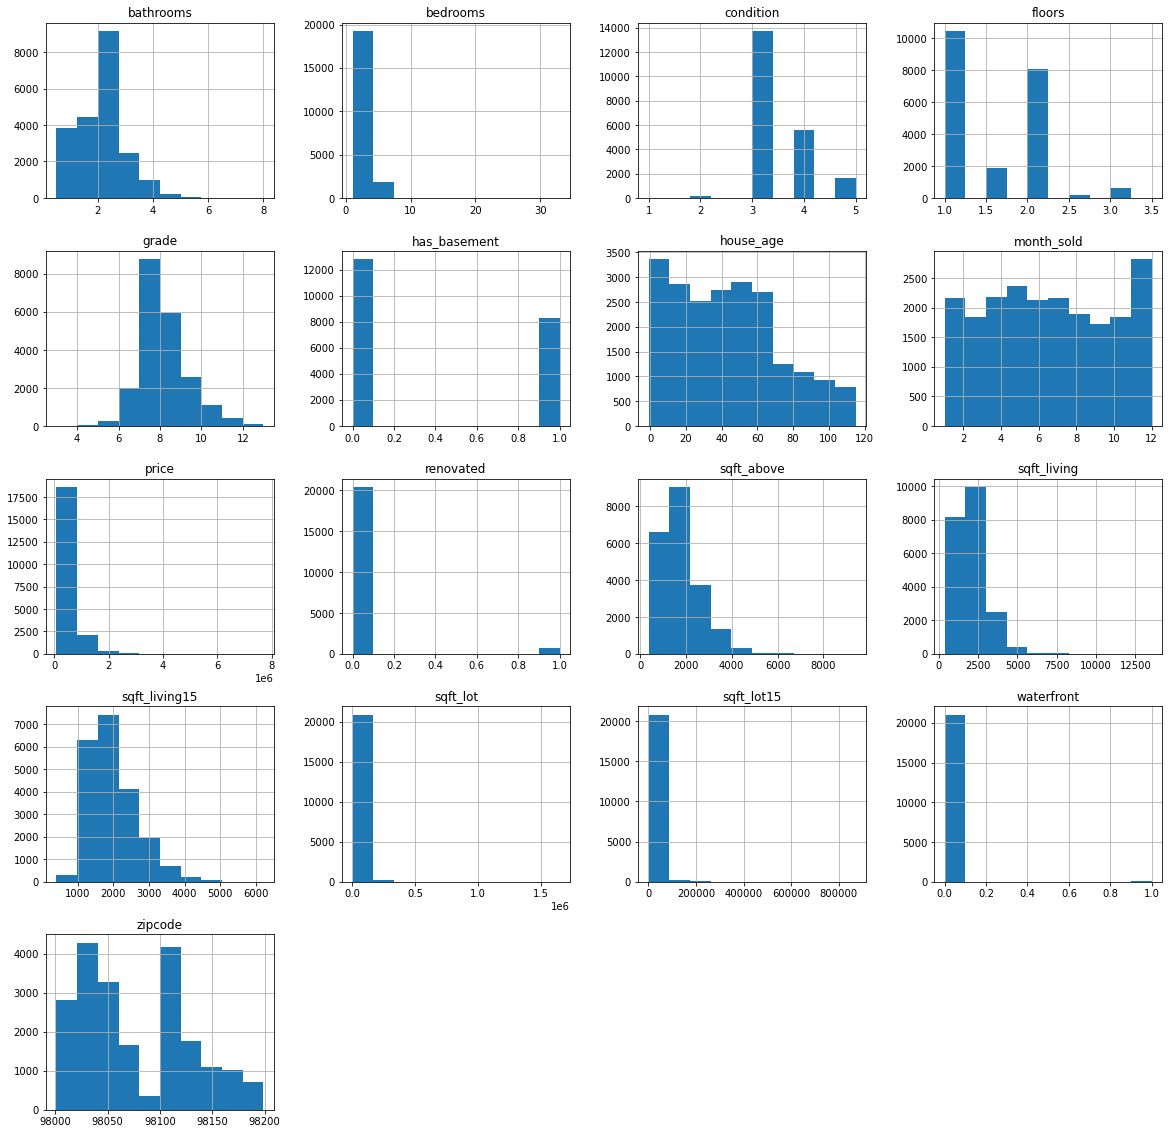

In [14]:
#Look at the distribution of each of our variables
#While they are not required to be normal, this may indicate the data might need to be transformed
data.hist(figsize=(20,20));

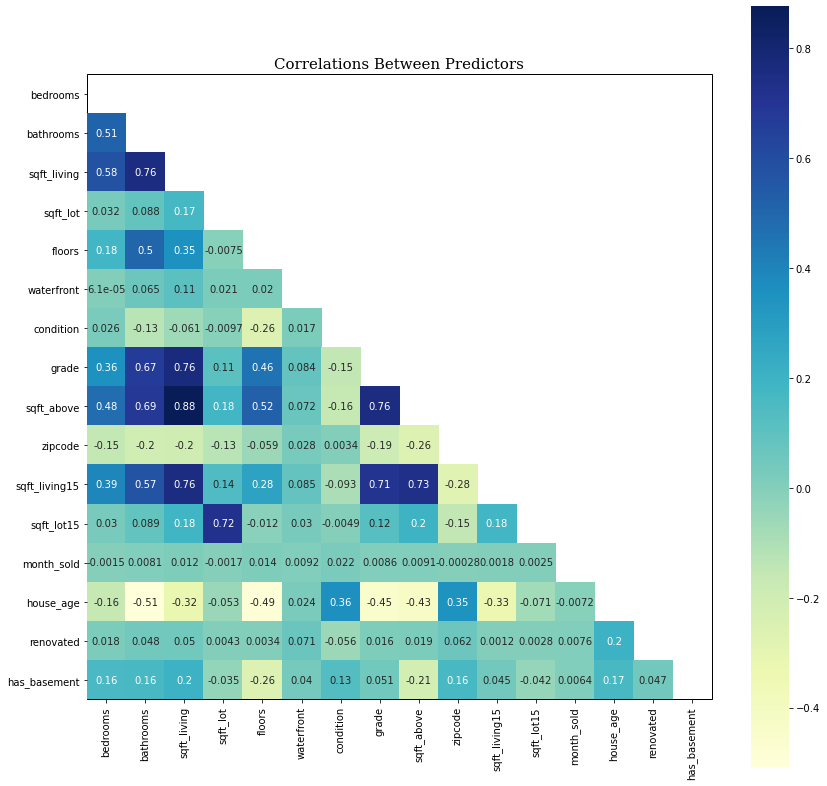

In [15]:
#Create a heatmap to display the correlations and check for multicollinearity 
#assuming any correlation above .65 is highly correlated, and correlations above .5 should be examined
#However for this inital model we will leave in all variables to get a general sense of an inital model
def create_heatmap(predictors):
    corr = predictors.corr()
    fig, ax = plt.subplots(figsize=(14,14))
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    sns.heatmap(corr, mask=mask, square=True, annot=True, cmap="YlGnBu")
    ax.patch.set_edgecolor('black')  
    ax.patch.set_linewidth('1')
    ax.set_title("Correlations Between Predictors", fontsize=15, fontfamily="serif");
create_heatmap(predictors)

In [16]:
#Create the regression equation
def regression(x_cols, outcome, df):
    predictors = ""
    for col in x_cols:
        if col in categorical_cols:
            predictors = predictors+"C("+col+")+"
        else:
            predictors = predictors+col+"+"
    predictors = predictors[:-1]
    formula = outcome + "~" + predictors
    model = ols(formula=formula, data=df).fit()
    display(model.summary())
    return model

#Tests how much a variable is correlated with the other predictors
#A VIF value over 5 indicates severe multicolinearity 
def calc_variance_inflation_factor(df, x_cols):
    X = df[x_cols]
    X = sm.add_constant(X)
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_scores = list(zip(x_cols, vif))
    for item in vif_scores:
        if item[1] > 6:
            print(item)

#Checks the normality of the residuals, one of the assumptions of linear regression 
def check_normality(model):
    #Visualize the residuals compared to a normal distribution
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    #Numerically test if the residuals are normal
    stat, p_val = stats.normaltest(model.resid)
    if p_val < .05:
        print(f"The residuals are not normally distributed, p = {p_val}.")
    else:
        print(f"The residuals are normally distributed, p = {p_val}.") 
    
#Checks the homoscedasticity assumption 
def check_homoscedasticity(df, x_cols, model):
    #plot the residuals versus the predicted values
    plt.scatter(model.predict(df[x_cols]), model.resid)
    plt.plot(model.predict(df[x_cols]), [0 for i in range(len(df))])
    #Numerically test if the model is homoskedastic, 
    #from https://medium.com/@remycanario17/tests-for-heteroskedasticity-in-python-208a0fdb04ab
    bp_test = het_breuschpagan(model.resid, df[x_cols])
    p_val = bp_test[1]
    if p_val < .05:
        print(f"The model is heteroskedastic, p = {p_val}.")
    else:
        print(f"The model is homoskedastic, p = {p_val}.") 

# Initial Model

In [17]:
#Seperate the outcome variable (price) and the predictors and creates a regression model 
outcome = "price"
x_cols = list(data.columns)
x_cols.remove(outcome)

model = regression(x_cols, outcome, data)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     950.7
Date:                Fri, 28 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:06:17   Log-Likelihood:            -2.8240e+05
No. Observations:               21143   AIC:                         5.650e+05
Df Residuals:                   21036   BIC:                         5.659e+05
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -6.912e+04   1.57e+05     -0.440      0.660   -3.77e+05    2.39e+05
C(waterfront)[T.1.0]  8.253e+05   1.34e+04     61.605      0.000    7.99e+05    8.52e+05
C(condition)[T.2]     7.361e+04   3.15e+04      2.335      0.020    1.18e+04    1.35e+05
C(condition)[T.3]     8.611e+04   2.94e+04      2.932      0.003    2.85e+04    1.44e+05
C(condition)[T.4]     1.137e+05   2.94e+04      3.869      0.000    5.61e+04    1.71e+05
C(condition)[T.5]      1.59e+05   2.96e+04      5.380      0.000    1.01e+05    2.17e+05
C(grade)[T.4]        -7.522e+04   1.57e+05     -0.480      0.631   -3.82e+05    2.32e+05
C(grade)[T.5]        -1.142e+05   1.54e+05     -0.741      0.459   -4.16e+05    1.88e+05
C(grade)[T.6]        -1.156e+05   1.54e+05     -0.751      0.452   -4.17e+05    1.86e+05
C(grade)[T.7]        -1.098e+05   1.54e+05     -0.713      0.476   -4.11e+05    1.92e+05
C(grade)[T.8]        -8.133e+04   1.54e+05     -0.528      0.597   -3.83e+05     2.2e+05
C(grade)[T.9]        -1990.3162   1.54e+05     -0.013      0.990   -3.04e+05       3e+05
C(grade)[T.10]        1.242e+05   1.54e+05      0.806      0.420   -1.78e+05    4.26e+05
C(grade)[T.11]        3.265e+05   1.54e+05      2.116      0.034    2.41e+04    6.29e+05
C(grade)[T.12]         7.51e+05   1.55e+05      4.842      0.000    4.47e+05    1.05e+06
C(grade)[T.13]        1.876e+06    1.6e+05     11.698      0.000    1.56e+06    2.19e+06
C(zipcode)[T.98002]   7163.2646   1.37e+04      0.524      0.601   -1.96e+04     3.4e+04
C(zipcode)[T.98003]  -2755.7944   1.24e+04     -0.222      0.824    -2.7e+04    2.15e+04
C(zipcode)[T.98004]   7.512e+05   1.21e+04     62.183      0.000    7.27e+05    7.75e+05
C(zipcode)[T.98005]   2.866e+05   1.46e+04     19.677      0.000    2.58e+05    3.15e+05
C(zipcode)[T.98006]   2.443e+05    1.1e+04     22.279      0.000    2.23e+05    2.66e+05
C(zipcode)[T.98007]   2.386e+05   1.54e+04     15.466      0.000    2.08e+05    2.69e+05
C(zipcode)[T.98008]   2.684e+05   1.24e+04     21.705      0.000    2.44e+05    2.93e+05
C(zipcode)[T.98010]   5.453e+04   1.76e+04      3.094      0.002       2e+04    8.91e+04
C(zipcode)[T.98011]   1.264e+05   1.38e+04      9.160      0.000    9.93e+04    1.53e+05
C(zipcode)[T.98014]   9.523e+04   1.64e+04      5.804      0.000    6.31e+04    1.27e+05
C(zipcode)[T.98019]   8.925e+04   1.39e+04      6.407      0.000    6.19e+04    1.17e+05
C(zipcode)[T.98022]    1.42e+04   1.32e+04      1.074      0.283   -1.17e+04    4.01e+04
C(zipcode)[T.98023]  -3.152e+04   1.08e+04     -2.932      0.003   -5.26e+04   -1.04e+04
C(zipcode)[T.98024]   1.489e+05   1.93e+04      7.698      0.000    1.11e+05    1.87e+05
C(zipcode)[T.98027]   1.544e+05   1.13e+04     13.642      0.000    1.32e+05    1.77e+05
C(zipcode)[T.98028]   1.275e+05   1.24e+04     10.319    

In [18]:
#Check how bad the multicollinearity is
calc_variance_inflation_factor(data, x_cols)         
#It appears some of our variables are highly correlated

('bedrooms', 4373742.308492941)
('sqft_lot', 16.85561093807409)
('zipcode', 16.534558752169442)


The residuals are not normally distributed, p = 0.0.


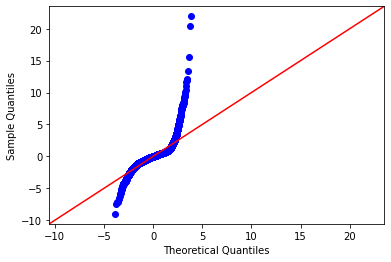

In [19]:
#Check the normality assumption
check_normality(model)

The model is heteroskedastic, p = 0.0.


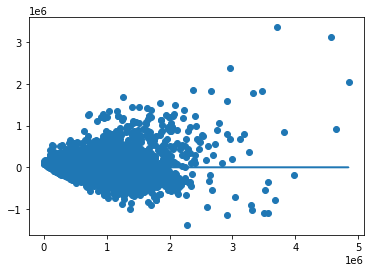

In [20]:
#Check for homoscedasticity
check_homoscedasticity(data, x_cols, model) 

In [21]:
x_cols.remove("sqft_living15")
x_cols.remove("sqft_above")
x_cols.remove("sqft_lot15")
model = regression(x_cols, outcome, data)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     969.7
Date:                Fri, 28 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:06:20   Log-Likelihood:            -2.8248e+05
No. Observations:               21143   AIC:                         5.652e+05
Df Residuals:                   21039   BIC:                         5.660e+05
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -2.21e+04   1.58e+05     -0.140      0.888   -3.31e+05    2.87e+05
C(waterfront)[T.1.0]   8.26e+05   1.34e+04     61.524      0.000       8e+05    8.52e+05
C(condition)[T.2]     6.414e+04   3.16e+04      2.028      0.043    2145.987    1.26e+05
C(condition)[T.3]     7.703e+04   2.95e+04      2.614      0.009    1.93e+04    1.35e+05
C(condition)[T.4]     1.028e+05   2.95e+04      3.487      0.000     4.5e+04    1.61e+05
C(condition)[T.5]     1.464e+05   2.97e+04      4.939      0.000    8.83e+04    2.05e+05
C(grade)[T.4]        -7.445e+04   1.57e+05     -0.474      0.636   -3.83e+05    2.34e+05
C(grade)[T.5]        -1.171e+05   1.55e+05     -0.757      0.449    -4.2e+05    1.86e+05
C(grade)[T.6]        -1.173e+05   1.54e+05     -0.760      0.447    -4.2e+05    1.85e+05
C(grade)[T.7]         -1.07e+05   1.54e+05     -0.693      0.488    -4.1e+05    1.96e+05
C(grade)[T.8]        -7.133e+04   1.54e+05     -0.462      0.644   -3.74e+05    2.31e+05
C(grade)[T.9]         1.751e+04   1.55e+05      0.113      0.910   -2.85e+05     3.2e+05
C(grade)[T.10]        1.492e+05   1.55e+05      0.965      0.334   -1.54e+05    4.52e+05
C(grade)[T.11]        3.587e+05   1.55e+05      2.317      0.021    5.53e+04    6.62e+05
C(grade)[T.12]        7.845e+05   1.56e+05      5.041      0.000    4.79e+05    1.09e+06
C(grade)[T.13]        1.892e+06   1.61e+05     11.761      0.000    1.58e+06    2.21e+06
C(zipcode)[T.98002]   1869.8046   1.37e+04      0.136      0.892    -2.5e+04    2.88e+04
C(zipcode)[T.98003]  -3144.3654   1.24e+04     -0.253      0.800   -2.75e+04    2.12e+04
C(zipcode)[T.98004]   7.591e+05   1.21e+04     62.713      0.000    7.35e+05    7.83e+05
C(zipcode)[T.98005]   2.946e+05   1.46e+04     20.177      0.000    2.66e+05    3.23e+05
C(zipcode)[T.98006]   2.554e+05   1.09e+04     23.327      0.000    2.34e+05    2.77e+05
C(zipcode)[T.98007]   2.409e+05   1.55e+04     15.564      0.000    2.11e+05    2.71e+05
C(zipcode)[T.98008]   2.691e+05   1.24e+04     21.688      0.000    2.45e+05    2.93e+05
C(zipcode)[T.98010]   5.485e+04   1.77e+04      3.107      0.002    2.02e+04    8.95e+04
C(zipcode)[T.98011]   1.339e+05   1.38e+04      9.678      0.000    1.07e+05    1.61e+05
C(zipcode)[T.98014]   8.987e+04   1.64e+04      5.489      0.000    5.78e+04    1.22e+05
C(zipcode)[T.98019]   9.259e+04   1.39e+04      6.638      0.000    6.52e+04     1.2e+05
C(zipcode)[T.98022]   1.237e+04   1.32e+04      0.934      0.350   -1.36e+04    3.83e+04
C(zipcode)[T.98023]  -2.964e+04   1.08e+04     -2.747      0.006   -5.08e+04   -8489.312
C(zipcode)[T.98024]    1.47e+05   1.93e+04      7.613      0.000    1.09e+05    1.85e+05
C(zipcode)[T.98027]   1.595e+05   1.13e+04     14.073      0.000    1.37e+05    1.82e+05
C(zipcode)[T.98028]   1.315e+05   1.24e+04     10.608    

In [22]:
calc_variance_inflation_factor(data, x_cols)         

('bedrooms', 4257487.716160444)


The residuals are not normally distributed, p = 0.0.


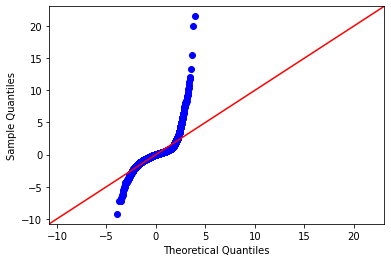

In [23]:
check_normality(model)

The model is heteroskedastic, p = 0.0.


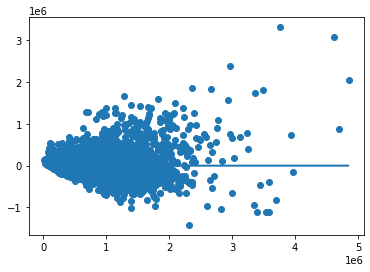

In [24]:
check_homoscedasticity(data, x_cols, model) 

In [25]:
x_cols.remove("bedrooms")
model = regression(x_cols, outcome, data)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     972.8
Date:                Fri, 28 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:06:23   Log-Likelihood:            -2.8254e+05
No. Observations:               21143   AIC:                         5.653e+05
Df Residuals:                   21040   BIC:                         5.661e+05
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -2.146e+04   1.58e+05     -0.136      0.892   -3.31e+05    2.88e+05
C(waterfront)[T.1.0]  8.357e+05   1.34e+04     62.210      0.000    8.09e+05    8.62e+05
C(condition)[T.2]     6.154e+04   3.17e+04      1.941      0.052    -618.927    1.24e+05
C(condition)[T.3]     7.415e+04   2.95e+04      2.509      0.012    1.62e+04    1.32e+05
C(condition)[T.4]     9.971e+04   2.96e+04      3.373      0.001    4.18e+04    1.58e+05
C(condition)[T.5]     1.433e+05   2.97e+04      4.818      0.000     8.5e+04    2.02e+05
C(grade)[T.4]        -8.264e+04   1.58e+05     -0.524      0.600   -3.92e+05    2.26e+05
C(grade)[T.5]        -1.346e+05   1.55e+05     -0.868      0.385   -4.39e+05    1.69e+05
C(grade)[T.6]        -1.374e+05   1.55e+05     -0.888      0.375   -4.41e+05    1.66e+05
C(grade)[T.7]        -1.297e+05   1.55e+05     -0.838      0.402   -4.33e+05    1.74e+05
C(grade)[T.8]        -9.137e+04   1.55e+05     -0.590      0.555   -3.95e+05    2.12e+05
C(grade)[T.9]          746.5765   1.55e+05      0.005      0.996   -3.03e+05    3.04e+05
C(grade)[T.10]        1.385e+05   1.55e+05      0.894      0.372   -1.65e+05    4.42e+05
C(grade)[T.11]        3.548e+05   1.55e+05      2.286      0.022    5.05e+04    6.59e+05
C(grade)[T.12]        7.919e+05   1.56e+05      5.075      0.000    4.86e+05     1.1e+06
C(grade)[T.13]        1.917e+06   1.61e+05     11.884      0.000     1.6e+06    2.23e+06
C(zipcode)[T.98002]    742.2923   1.38e+04      0.054      0.957   -2.62e+04    2.77e+04
C(zipcode)[T.98003]  -1840.0550   1.25e+04     -0.148      0.883   -2.63e+04    2.26e+04
C(zipcode)[T.98004]   7.597e+05   1.21e+04     62.591      0.000    7.36e+05    7.83e+05
C(zipcode)[T.98005]   2.939e+05   1.46e+04     20.074      0.000    2.65e+05    3.23e+05
C(zipcode)[T.98006]   2.554e+05    1.1e+04     23.259      0.000    2.34e+05    2.77e+05
C(zipcode)[T.98007]   2.369e+05   1.55e+04     15.264      0.000    2.06e+05    2.67e+05
C(zipcode)[T.98008]   2.663e+05   1.24e+04     21.404      0.000    2.42e+05    2.91e+05
C(zipcode)[T.98010]   5.649e+04   1.77e+04      3.191      0.001    2.18e+04    9.12e+04
C(zipcode)[T.98011]   1.353e+05   1.39e+04      9.758      0.000    1.08e+05    1.63e+05
C(zipcode)[T.98014]   9.529e+04   1.64e+04      5.807      0.000    6.31e+04    1.27e+05
C(zipcode)[T.98019]   9.544e+04    1.4e+04      6.826      0.000     6.8e+04    1.23e+05
C(zipcode)[T.98022]   1.452e+04   1.33e+04      1.094      0.274   -1.15e+04    4.05e+04
C(zipcode)[T.98023]  -2.982e+04   1.08e+04     -2.756      0.006    -5.1e+04   -8612.471
C(zipcode)[T.98024]   1.504e+05   1.94e+04      7.769      0.000    1.12e+05    1.88e+05
C(zipcode)[T.98027]   1.618e+05   1.14e+04     14.241      0.000     1.4e+05    1.84e+05
C(zipcode)[T.98028]   1.328e+05   1.24e+04     10.685    

In [26]:
calc_variance_inflation_factor(data, x_cols)         

('bathrooms', 4241831.08373141)


The residuals are not normally distributed, p = 0.0.


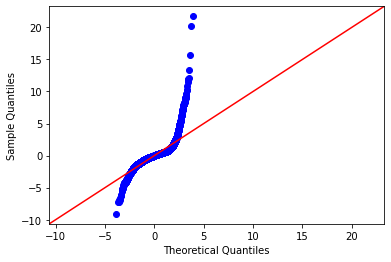

In [27]:
check_normality(model)

The model is heteroskedastic, p = 0.0.


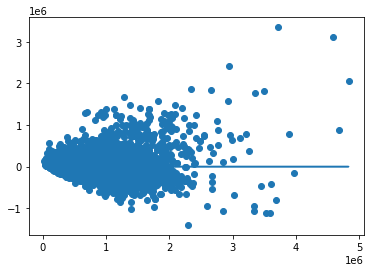

In [28]:
check_homoscedasticity(data, x_cols, model) 

# Refining the Model

In [29]:
#https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
Q1 = qual_predictors.quantile(0.25)
Q3 = qual_predictors.quantile(0.75)
IQR = Q3 - Q1

In [30]:
print(Q1)

bedrooms           3.000
bathrooms          1.750
sqft_living     1430.000
sqft_lot        5043.000
floors             1.000
sqft_above      1200.000
sqft_living15   1490.000
sqft_lot15      5100.000
house_age         18.000
Name: 0.25, dtype: float64


In [31]:
print(Q3)

bedrooms            4.000
bathrooms           2.500
sqft_living      2550.000
sqft_lot        10695.500
floors              2.000
sqft_above       2210.000
sqft_living15    2360.000
sqft_lot15      10087.000
house_age          63.000
Name: 0.75, dtype: float64


In [32]:
print(IQR)

bedrooms           1.000
bathrooms          0.750
sqft_living     1120.000
sqft_lot        5652.500
floors             1.000
sqft_above      1010.000
sqft_living15    870.000
sqft_lot15      4987.000
house_age         45.000
dtype: float64


In [33]:
cleaned_data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
display(cleaned_data.head())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,zipcode,sqft_living15,sqft_lot15,month_sold,house_age,renovated,has_basement
0,221900.000,3,1.000,1180,5650,1.000,0.000,3,7,1180,98178,1340,5650,10,59,0,0
1,538000.000,3,2.250,2570,7242,2.000,0.000,3,7,2170,98125,1690,7639,12,63,1,1
2,180000.000,2,1.000,770,10000,1.000,0.000,3,6,770,98028,2720,8062,2,82,0,0
3,604000.000,4,3.000,1960,5000,1.000,0.000,5,7,1050,98136,1360,5000,12,49,0,1
4,510000.000,3,2.000,1680,8080,1.000,0.000,3,8,1680,98074,1800,7503,2,28,0,0


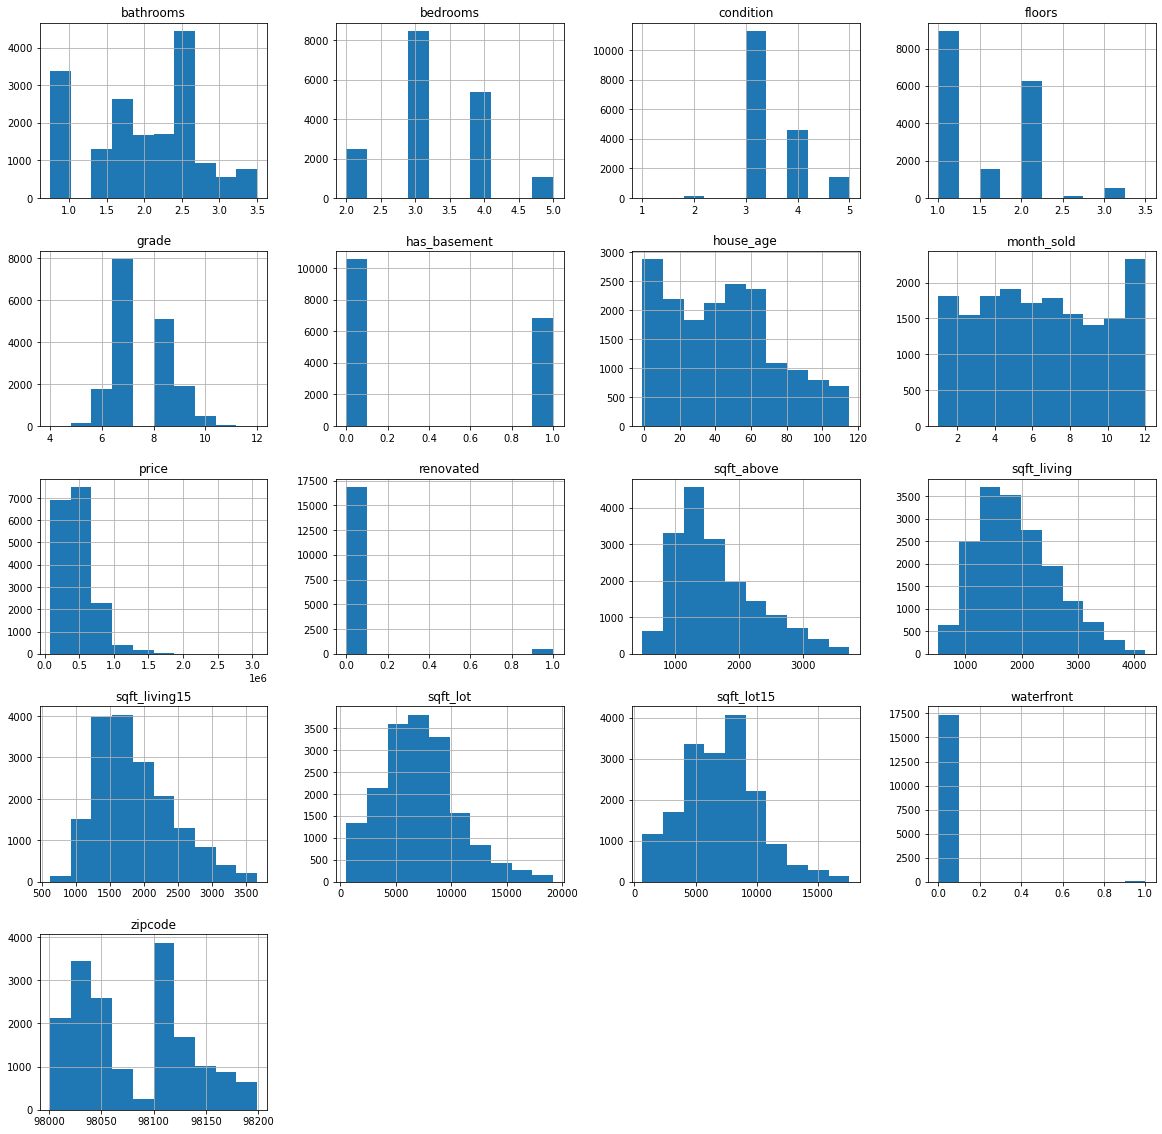

In [34]:
#Look at the distributions for the cleaned dataset
cleaned_data.hist(figsize=(20,20));
#While a few of the distributions have gotten more normal, many still are not

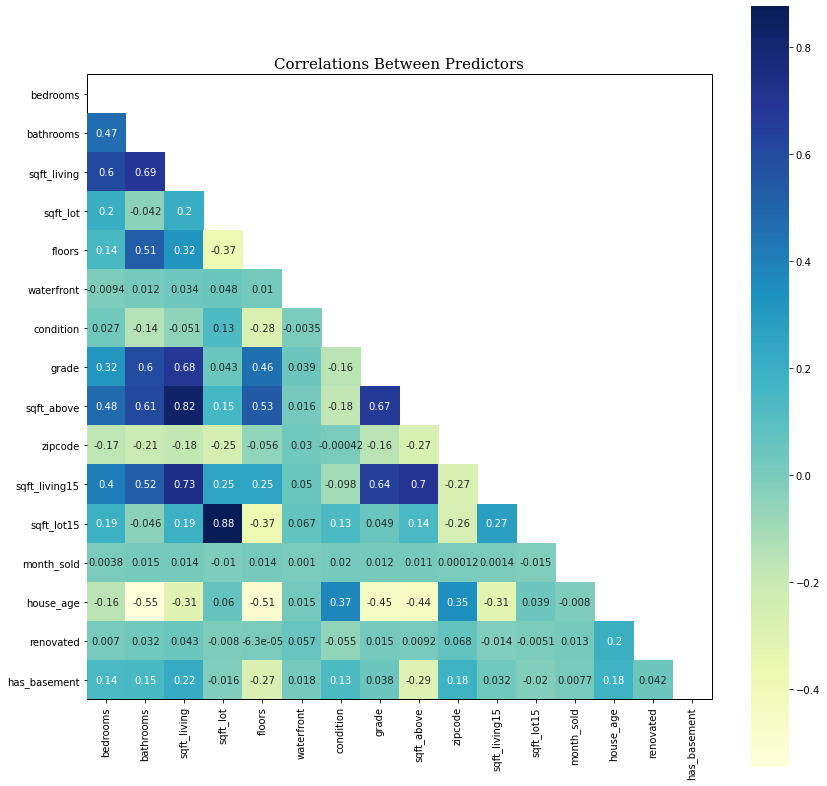

In [35]:
#Look at the correlations between the preditors 
predictors = cleaned_data.copy()
predictors = predictors.drop(columns=["price"])
create_heatmap(predictors)
#There are still some high correlations

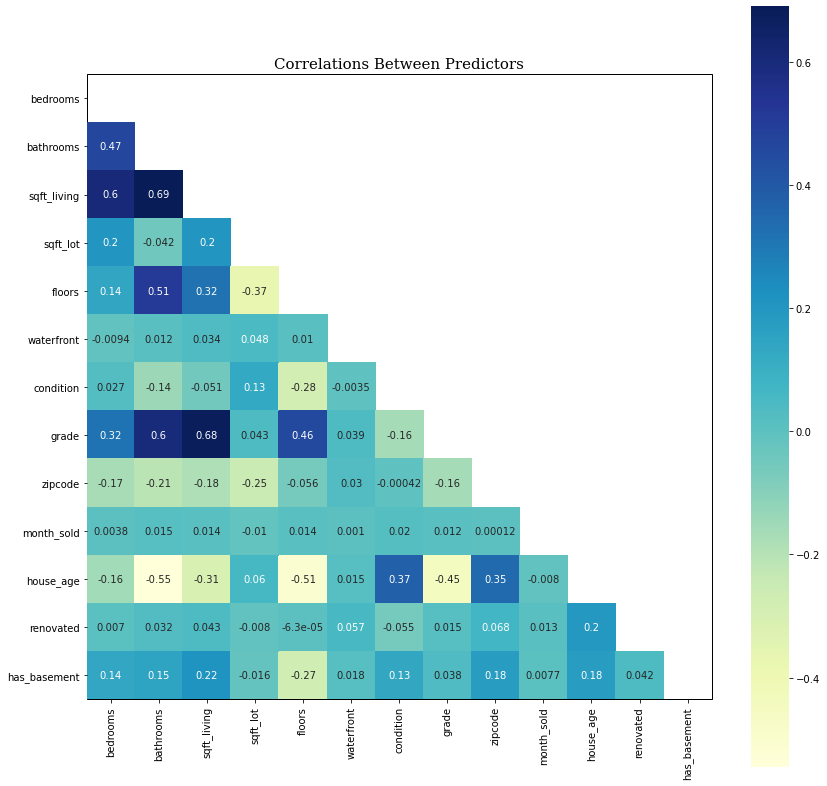

In [36]:
#Since sqft_living15 is highly correlated with multiple variables and is not specific to the house,
#it can be dropped. Similarly, we can drop sqft_lot15. Both these factors 
#cannot be controlled by the buyer or seller, so they provide limited use.
#The data provided by sqft_above is captured in the
#total and whether or not there is a basement, so it can be dropped
predictors = predictors.drop(columns=["sqft_living15", "sqft_above", "sqft_lot15"])
create_heatmap(predictors)

# Commented

In [37]:
# for col in predictors.columns:
#     g = sns.jointplot(col, "price", data=data_cleaned, kind="reg", line_kws = {"color": 'black'})
#     g.fig.suptitle(f"{col} vs Price")

In [38]:
cleaned_data = cleaned_data.drop(columns=["sqft_living15", "sqft_above", "sqft_lot15"])

In [39]:
x_cols_2 = list(cleaned_data.columns)
x_cols_2.remove(outcome)
model2 = regression(x_cols_2, outcome, cleaned_data)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     721.3
Date:                Fri, 28 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:06:34   Log-Likelihood:            -2.2632e+05
No. Observations:               17392   AIC:                         4.528e+05
Df Residuals:                   17290   BIC:                         4.536e+05
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -2.172e+05   4.49e+04     -4.841      0.000   -3.05e+05   -1.29e+05
C(waterfront)[T.1.0]  5.804e+05   1.81e+04     32.115      0.000    5.45e+05    6.16e+05
C(condition)[T.2]     9.894e+04   2.85e+04      3.471      0.001    4.31e+04    1.55e+05
C(condition)[T.3]     1.284e+05   2.67e+04      4.803      0.000     7.6e+04    1.81e+05
C(condition)[T.4]     1.497e+05   2.68e+04      5.598      0.000    9.73e+04    2.02e+05
C(condition)[T.5]     1.867e+05   2.69e+04      6.953      0.000    1.34e+05    2.39e+05
C(grade)[T.5]         3591.3840   3.57e+04      0.101      0.920   -6.64e+04    7.35e+04
C(grade)[T.6]         7236.9765   3.47e+04      0.208      0.835   -6.09e+04    7.53e+04
C(grade)[T.7]         3.092e+04   3.47e+04      0.890      0.373   -3.72e+04     9.9e+04
C(grade)[T.8]         7.955e+04   3.48e+04      2.283      0.022    1.13e+04    1.48e+05
C(grade)[T.9]         1.895e+05    3.5e+04      5.410      0.000    1.21e+05    2.58e+05
C(grade)[T.10]         2.91e+05   3.54e+04      8.224      0.000    2.22e+05     3.6e+05
C(grade)[T.11]        4.969e+05   3.85e+04     12.923      0.000    4.22e+05    5.72e+05
C(grade)[T.12]        1.109e+06   8.55e+04     12.967      0.000    9.41e+05    1.28e+06
C(zipcode)[T.98002]   1.072e+04   1.04e+04      1.034      0.301   -9593.320     3.1e+04
C(zipcode)[T.98003]   6582.6654   9487.206      0.694      0.488    -1.2e+04    2.52e+04
C(zipcode)[T.98004]   6.062e+05   1.03e+04     58.818      0.000    5.86e+05    6.26e+05
C(zipcode)[T.98005]   3.142e+05   1.23e+04     25.627      0.000     2.9e+05    3.38e+05
C(zipcode)[T.98006]   2.647e+05   8854.389     29.889      0.000    2.47e+05    2.82e+05
C(zipcode)[T.98007]   2.352e+05   1.19e+04     19.791      0.000    2.12e+05    2.59e+05
C(zipcode)[T.98008]   2.473e+05   9569.273     25.841      0.000    2.29e+05    2.66e+05
C(zipcode)[T.98010]   7.749e+04   1.75e+04      4.417      0.000    4.31e+04    1.12e+05
C(zipcode)[T.98011]   1.381e+05   1.06e+04     13.038      0.000    1.17e+05    1.59e+05
C(zipcode)[T.98014]   9.359e+04   1.89e+04      4.964      0.000    5.66e+04    1.31e+05
C(zipcode)[T.98019]   9.812e+04   1.14e+04      8.575      0.000    7.57e+04    1.21e+05
C(zipcode)[T.98022]   1.048e+04   1.13e+04      0.929      0.353   -1.16e+04    3.26e+04
C(zipcode)[T.98023]   -2.12e+04   8320.560     -2.548      0.011   -3.75e+04   -4890.234
C(zipcode)[T.98024]   1.189e+05   2.37e+04      5.016      0.000    7.24e+04    1.65e+05
C(zipcode)[T.98027]   2.205e+05   9831.429     22.428      0.000    2.01e+05     2.4e+05
C(zipcode)[T.98028]   1.277e+05   9555.456     13.368      0.000    1.09e+05    1.46e+05
C(zipcode)[T.98029]   2.217e+05   9344.456     23.723      0.000    2.03e+05     2.4e+05
C(zipcode)[T.98030]   4926.4334   9627.574      0.512    

In [40]:
#Check how bad the multicollinearity is
calc_variance_inflation_factor(cleaned_data, x_cols_2)         
#It appears many of our variables are still highly correlated

('bedrooms', 4311431.19931641)


The residuals are not normally distributed, p = 0.0.


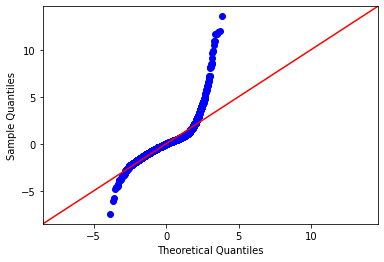

In [41]:
#Check the normality assumption
check_normality(model2)
#The residuals are more normal but still not fully normal

The model is heteroskedastic, p = 0.0.


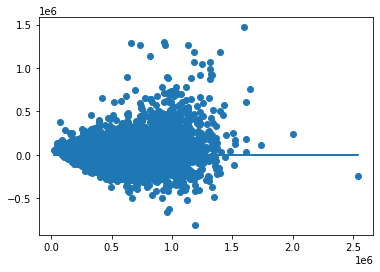

In [42]:
#Check for homoscedasticity
check_homoscedasticity(cleaned_data, x_cols_2, model2) 
#This assumption still appears to be violated

In [43]:
df_train, df_test = train_test_split(cleaned_data)

In [44]:
model_train = regression(x_cols_2, outcome, df_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     532.3
Date:                Fri, 28 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:06:36   Log-Likelihood:            -1.6982e+05
No. Observations:               13044   AIC:                         3.398e+05
Df Residuals:                   12942   BIC:                         3.406e+05
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -2.195e+05   5.25e+04     -4.176      0.000   -3.22e+05   -1.16e+05
C(waterfront)[T.1.0]  6.062e+05   1.99e+04     30.517      0.000    5.67e+05    6.45e+05
C(condition)[T.2]     1.068e+05    3.2e+04      3.338      0.001    4.41e+04    1.69e+05
C(condition)[T.3]     1.299e+05   2.97e+04      4.368      0.000    7.16e+04    1.88e+05
C(condition)[T.4]     1.509e+05   2.97e+04      5.075      0.000    9.26e+04    2.09e+05
C(condition)[T.5]     1.893e+05   2.99e+04      6.338      0.000    1.31e+05    2.48e+05
C(grade)[T.5]         2629.3597    4.3e+04      0.061      0.951   -8.16e+04    8.69e+04
C(grade)[T.6]         6689.2203   4.18e+04      0.160      0.873   -7.53e+04    8.87e+04
C(grade)[T.7]         3.313e+04   4.18e+04      0.792      0.428   -4.88e+04    1.15e+05
C(grade)[T.8]         8.302e+04   4.19e+04      1.980      0.048     828.045    1.65e+05
C(grade)[T.9]         1.957e+05   4.21e+04      4.645      0.000    1.13e+05    2.78e+05
C(grade)[T.10]        3.031e+05   4.25e+04      7.128      0.000     2.2e+05    3.86e+05
C(grade)[T.11]        4.958e+05   4.58e+04     10.813      0.000    4.06e+05    5.86e+05
C(grade)[T.12]        1.098e+06   8.94e+04     12.285      0.000    9.23e+05    1.27e+06
C(zipcode)[T.98002]   1.297e+04   1.22e+04      1.061      0.289    -1.1e+04    3.69e+04
C(zipcode)[T.98003]   7688.6225    1.1e+04      0.702      0.483   -1.38e+04    2.92e+04
C(zipcode)[T.98004]   5.862e+05   1.22e+04     47.909      0.000    5.62e+05     6.1e+05
C(zipcode)[T.98005]   3.181e+05   1.39e+04     22.807      0.000    2.91e+05    3.45e+05
C(zipcode)[T.98006]   2.643e+05   1.04e+04     25.523      0.000    2.44e+05    2.85e+05
C(zipcode)[T.98007]   2.349e+05   1.36e+04     17.302      0.000    2.08e+05    2.62e+05
C(zipcode)[T.98008]   2.445e+05   1.12e+04     21.796      0.000    2.22e+05    2.66e+05
C(zipcode)[T.98010]   7.451e+04   2.09e+04      3.570      0.000    3.36e+04    1.15e+05
C(zipcode)[T.98011]   1.369e+05   1.24e+04     11.018      0.000    1.13e+05    1.61e+05
C(zipcode)[T.98014]   9.479e+04   2.25e+04      4.217      0.000    5.07e+04    1.39e+05
C(zipcode)[T.98019]   9.906e+04   1.28e+04      7.747      0.000     7.4e+04    1.24e+05
C(zipcode)[T.98022]   1.833e+04   1.33e+04      1.378      0.168   -7753.852    4.44e+04
C(zipcode)[T.98023]  -1.891e+04   9836.874     -1.923      0.055   -3.82e+04     369.573
C(zipcode)[T.98024]   1.201e+05   2.64e+04      4.546      0.000    6.83e+04    1.72e+05
C(zipcode)[T.98027]    2.23e+05   1.13e+04     19.728      0.000    2.01e+05    2.45e+05
C(zipcode)[T.98028]   1.286e+05    1.1e+04     11.647      0.000    1.07e+05     1.5e+05
C(zipcode)[T.98029]   2.217e+05    1.1e+04     20.238      0.000       2e+05    2.43e+05
C(zipcode)[T.98030]   5147.5248   1.14e+04      0.450    

In [45]:
y_train_pred = model_train.predict(df_train)
y_test_pred = model_train.predict(df_test)

In [46]:
r2_train = r2_score(df_train['price'],y_train_pred )
r2_test = r2_score(df_test['price'],y_test_pred )

print(f"Training Score: {r2_train}")
print(f"Test Score: {r2_test}")

Training Score: 0.805987014719817
Test Score: 0.8125047645492125


# Off the rails time 

In [47]:
x_cols_4 = x_cols_2.copy()
x_cols_4.remove("bedrooms")
model4 = regression(x_cols_4, outcome, cleaned_data)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     726.3
Date:                Fri, 28 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:06:38   Log-Likelihood:            -2.2634e+05
No. Observations:               17392   AIC:                         4.529e+05
Df Residuals:                   17291   BIC:                         4.537e+05
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -2.275e+05   4.49e+04     -5.067      0.000   -3.15e+05   -1.39e+05
C(waterfront)[T.1.0]  5.841e+05   1.81e+04     32.298      0.000    5.49e+05     6.2e+05
C(condition)[T.2]     9.852e+04   2.85e+04      3.452      0.001    4.26e+04    1.54e+05
C(condition)[T.3]      1.28e+05   2.68e+04      4.780      0.000    7.55e+04     1.8e+05
C(condition)[T.4]     1.493e+05   2.68e+04      5.573      0.000    9.68e+04    2.02e+05
C(condition)[T.5]     1.861e+05   2.69e+04      6.920      0.000    1.33e+05    2.39e+05
C(grade)[T.5]         1429.9624   3.57e+04      0.040      0.968   -6.86e+04    7.15e+04
C(grade)[T.6]         4030.6180   3.48e+04      0.116      0.908   -6.41e+04    7.22e+04
C(grade)[T.7]         2.684e+04   3.48e+04      0.772      0.440   -4.13e+04     9.5e+04
C(grade)[T.8]         7.707e+04   3.49e+04      2.209      0.027    8691.344    1.45e+05
C(grade)[T.9]         1.887e+05   3.51e+04      5.380      0.000     1.2e+05    2.57e+05
C(grade)[T.10]        2.931e+05   3.54e+04      8.273      0.000    2.24e+05    3.62e+05
C(grade)[T.11]        5.006e+05   3.85e+04     13.004      0.000    4.25e+05    5.76e+05
C(grade)[T.12]        1.116e+06   8.56e+04     13.033      0.000    9.48e+05    1.28e+06
C(zipcode)[T.98002]   1.087e+04   1.04e+04      1.047      0.295   -9469.784    3.12e+04
C(zipcode)[T.98003]   7594.6942   9497.640      0.800      0.424    -1.1e+04    2.62e+04
C(zipcode)[T.98004]   6.075e+05   1.03e+04     58.880      0.000    5.87e+05    6.28e+05
C(zipcode)[T.98005]   3.154e+05   1.23e+04     25.696      0.000    2.91e+05    3.39e+05
C(zipcode)[T.98006]   2.652e+05   8864.922     29.914      0.000    2.48e+05    2.83e+05
C(zipcode)[T.98007]   2.343e+05   1.19e+04     19.692      0.000    2.11e+05    2.58e+05
C(zipcode)[T.98008]    2.46e+05   9579.213     25.685      0.000    2.27e+05    2.65e+05
C(zipcode)[T.98010]   7.828e+04   1.76e+04      4.456      0.000    4.38e+04    1.13e+05
C(zipcode)[T.98011]   1.397e+05   1.06e+04     13.178      0.000    1.19e+05     1.6e+05
C(zipcode)[T.98014]   9.516e+04   1.89e+04      5.041      0.000    5.82e+04    1.32e+05
C(zipcode)[T.98019]   9.994e+04   1.15e+04      8.726      0.000    7.75e+04    1.22e+05
C(zipcode)[T.98022]   1.197e+04   1.13e+04      1.060      0.289   -1.02e+04    3.41e+04
C(zipcode)[T.98023]  -2.073e+04   8330.490     -2.488      0.013   -3.71e+04   -4397.741
C(zipcode)[T.98024]   1.193e+05   2.37e+04      5.030      0.000    7.28e+04    1.66e+05
C(zipcode)[T.98027]   2.221e+05   9840.683     22.565      0.000    2.03e+05    2.41e+05
C(zipcode)[T.98028]   1.292e+05   9564.562     13.510      0.000     1.1e+05    1.48e+05
C(zipcode)[T.98029]   2.234e+05   9352.410     23.885      0.000    2.05e+05    2.42e+05
C(zipcode)[T.98030]   5529.0270   9638.988      0.574    

In [48]:
calc_variance_inflation_factor(cleaned_data, x_cols_4)         

('bathrooms', 4301061.450138902)


The residuals are not normally distributed, p = 0.0.


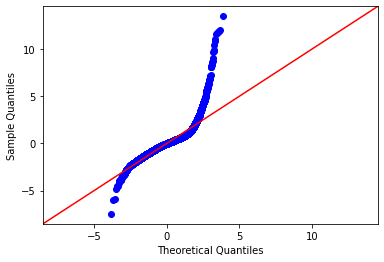

In [49]:
check_normality(model4)

The model is heteroskedastic, p = 0.0.


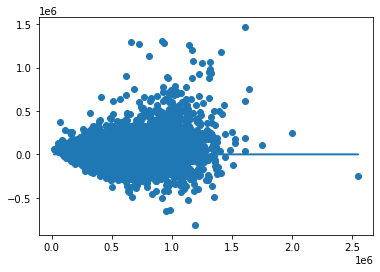

In [50]:
check_homoscedasticity(cleaned_data, x_cols_4, model4) 

In [51]:
x_cols_5 = x_cols_4.copy()
x_cols_5.remove("bathrooms")
model5 = regression(x_cols_5, outcome, cleaned_data)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     729.6
Date:                Fri, 28 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:06:40   Log-Likelihood:            -2.2638e+05
No. Observations:               17392   AIC:                         4.530e+05
Df Residuals:                   17292   BIC:                         4.537e+05
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -2.081e+05   4.49e+04     -4.631      0.000   -2.96e+05    -1.2e+05
C(waterfront)[T.1.0]  5.832e+05   1.81e+04     32.177      0.000    5.48e+05    6.19e+05
C(condition)[T.2]     9.822e+04   2.86e+04      3.434      0.001    4.22e+04    1.54e+05
C(condition)[T.3]     1.269e+05   2.68e+04      4.728      0.000    7.43e+04     1.8e+05
C(condition)[T.4]     1.486e+05   2.68e+04      5.538      0.000     9.6e+04    2.01e+05
C(condition)[T.5]     1.884e+05   2.69e+04      6.991      0.000    1.36e+05    2.41e+05
C(grade)[T.5]         2701.5736   3.58e+04      0.075      0.940   -6.75e+04    7.29e+04
C(grade)[T.6]         3381.9573   3.49e+04      0.097      0.923   -6.49e+04    7.17e+04
C(grade)[T.7]         2.842e+04   3.48e+04      0.816      0.415   -3.99e+04    9.67e+04
C(grade)[T.8]          8.01e+04    3.5e+04      2.291      0.022    1.16e+04    1.49e+05
C(grade)[T.9]         1.903e+05   3.51e+04      5.413      0.000    1.21e+05    2.59e+05
C(grade)[T.10]        2.944e+05   3.55e+04      8.292      0.000    2.25e+05    3.64e+05
C(grade)[T.11]            5e+05   3.86e+04     12.959      0.000    4.24e+05    5.76e+05
C(grade)[T.12]        1.115e+06   8.58e+04     12.995      0.000    9.47e+05    1.28e+06
C(zipcode)[T.98002]   1.106e+04   1.04e+04      1.064      0.288   -9322.002    3.14e+04
C(zipcode)[T.98003]   7688.7286   9518.553      0.808      0.419    -1.1e+04    2.63e+04
C(zipcode)[T.98004]   6.072e+05   1.03e+04     58.720      0.000    5.87e+05    6.27e+05
C(zipcode)[T.98005]   3.167e+05   1.23e+04     25.747      0.000    2.93e+05    3.41e+05
C(zipcode)[T.98006]   2.644e+05   8883.962     29.758      0.000    2.47e+05    2.82e+05
C(zipcode)[T.98007]   2.342e+05   1.19e+04     19.635      0.000    2.11e+05    2.58e+05
C(zipcode)[T.98008]   2.469e+05   9599.768     25.724      0.000    2.28e+05    2.66e+05
C(zipcode)[T.98010]   7.704e+04   1.76e+04      4.376      0.000    4.25e+04    1.12e+05
C(zipcode)[T.98011]   1.402e+05   1.06e+04     13.198      0.000    1.19e+05    1.61e+05
C(zipcode)[T.98014]   9.356e+04   1.89e+04      4.946      0.000    5.65e+04    1.31e+05
C(zipcode)[T.98019]   1.006e+05   1.15e+04      8.761      0.000    7.81e+04    1.23e+05
C(zipcode)[T.98022]   1.215e+04   1.13e+04      1.073      0.283      -1e+04    3.43e+04
C(zipcode)[T.98023]  -2.102e+04   8348.772     -2.517      0.012   -3.74e+04   -4650.903
C(zipcode)[T.98024]   1.193e+05   2.38e+04      5.017      0.000    7.27e+04    1.66e+05
C(zipcode)[T.98027]    2.22e+05   9862.353     22.508      0.000    2.03e+05    2.41e+05
C(zipcode)[T.98028]   1.287e+05   9585.466     13.430      0.000     1.1e+05    1.48e+05
C(zipcode)[T.98029]   2.248e+05   9371.530     23.992      0.000    2.06e+05    2.43e+05
C(zipcode)[T.98030]   6240.8322   9659.876      0.646    

In [52]:
calc_variance_inflation_factor(cleaned_data, x_cols_5)         

('sqft_living', 4281881.945448746)


The residuals are not normally distributed, p = 0.0.


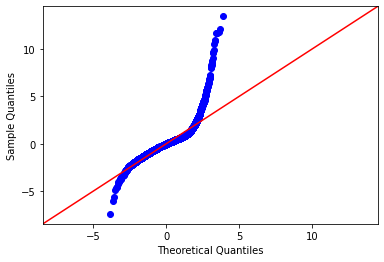

In [53]:
check_normality(model5)

The model is heteroskedastic, p = 0.0.


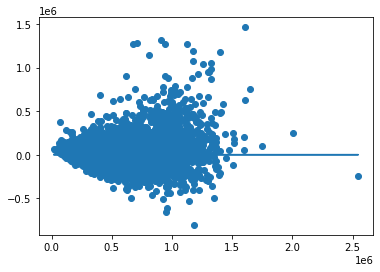

In [54]:
check_homoscedasticity(cleaned_data, x_cols_5, model5) 

In [55]:
x_cols_6 = x_cols_5.copy()
x_cols_6.remove("sqft_living")
model6 = regression(x_cols_6, outcome, cleaned_data)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     521.6
Date:                Fri, 28 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:06:43   Log-Likelihood:            -2.2872e+05
No. Observations:               17392   AIC:                         4.576e+05
Df Residuals:                   17293   BIC:                         4.584e+05
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -2.103e+05   5.14e+04     -4.091      0.000   -3.11e+05    -1.1e+05
C(waterfront)[T.1.0]  5.569e+05   2.07e+04     26.864      0.000    5.16e+05    5.97e+05
C(condition)[T.2]     8.515e+04   3.27e+04      2.602      0.009     2.1e+04    1.49e+05
C(condition)[T.3]     1.237e+05   3.07e+04      4.029      0.000    6.35e+04    1.84e+05
C(condition)[T.4]     1.459e+05   3.07e+04      4.750      0.000    8.57e+04    2.06e+05
C(condition)[T.5]     2.006e+05   3.08e+04      6.507      0.000     1.4e+05    2.61e+05
C(grade)[T.5]         3.232e+04    4.1e+04      0.789      0.430    -4.8e+04    1.13e+05
C(grade)[T.6]          5.83e+04   3.99e+04      1.462      0.144   -1.98e+04    1.36e+05
C(grade)[T.7]         1.322e+05   3.98e+04      3.320      0.001    5.42e+04     2.1e+05
C(grade)[T.8]         2.376e+05   3.99e+04      5.954      0.000    1.59e+05    3.16e+05
C(grade)[T.9]         4.254e+05      4e+04     10.624      0.000    3.47e+05    5.04e+05
C(grade)[T.10]        5.667e+05   4.04e+04     14.030      0.000    4.87e+05    6.46e+05
C(grade)[T.11]        8.135e+05   4.39e+04     18.548      0.000    7.28e+05       9e+05
C(grade)[T.12]        1.535e+06   9.79e+04     15.679      0.000    1.34e+06    1.73e+06
C(zipcode)[T.98002]   1.402e+04   1.19e+04      1.179      0.239   -9296.135    3.73e+04
C(zipcode)[T.98003]  -9600.3931   1.09e+04     -0.882      0.378   -3.09e+04    1.17e+04
C(zipcode)[T.98004]   5.932e+05   1.18e+04     50.159      0.000     5.7e+05    6.16e+05
C(zipcode)[T.98005]   3.131e+05   1.41e+04     22.250      0.000    2.85e+05    3.41e+05
C(zipcode)[T.98006]   2.559e+05   1.02e+04     25.186      0.000    2.36e+05    2.76e+05
C(zipcode)[T.98007]   2.209e+05   1.36e+04     16.194      0.000    1.94e+05    2.48e+05
C(zipcode)[T.98008]   2.428e+05    1.1e+04     22.111      0.000    2.21e+05    2.64e+05
C(zipcode)[T.98010]   6.377e+04   2.01e+04      3.167      0.002    2.43e+04    1.03e+05
C(zipcode)[T.98011]   1.444e+05   1.22e+04     11.878      0.000    1.21e+05    1.68e+05
C(zipcode)[T.98014]    6.77e+04   2.16e+04      3.129      0.002    2.53e+04     1.1e+05
C(zipcode)[T.98019]   1.207e+05   1.31e+04      9.194      0.000     9.5e+04    1.46e+05
C(zipcode)[T.98022]   3460.5063   1.29e+04      0.267      0.789   -2.19e+04    2.88e+04
C(zipcode)[T.98023]  -3.179e+04   9549.043     -3.329      0.001   -5.05e+04   -1.31e+04
C(zipcode)[T.98024]   9.495e+04   2.72e+04      3.491      0.000    4.16e+04    1.48e+05
C(zipcode)[T.98027]   2.009e+05   1.13e+04     17.815      0.000    1.79e+05    2.23e+05
C(zipcode)[T.98028]   1.255e+05    1.1e+04     11.448      0.000    1.04e+05    1.47e+05
C(zipcode)[T.98029]   2.102e+05   1.07e+04     19.611      0.000    1.89e+05    2.31e+05
C(zipcode)[T.98030]   8925.8088   1.11e+04      0.808    

In [56]:
calc_variance_inflation_factor(cleaned_data, x_cols_6)         

('sqft_lot', 4249659.364329685)


The residuals are not normally distributed, p = 0.0.


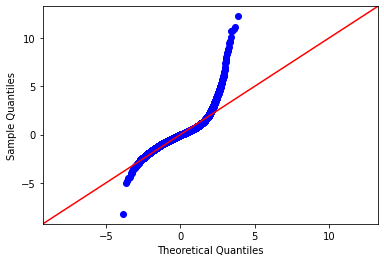

In [57]:
check_normality(model6)

The model is heteroskedastic, p = 0.0.


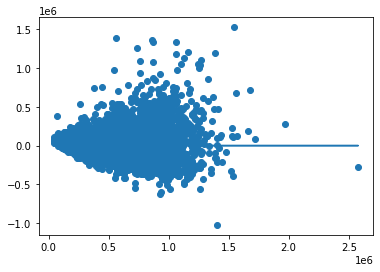

In [58]:
check_homoscedasticity(cleaned_data, x_cols_6, model6) 

In [59]:
x_cols_7 = x_cols_6.copy()
x_cols_7.remove("sqft_lot")
model7 = regression(x_cols_7, outcome, cleaned_data)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     510.0
Date:                Fri, 28 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:06:45   Log-Likelihood:            -2.2893e+05
No. Observations:               17392   AIC:                         4.581e+05
Df Residuals:                   17294   BIC:                         4.588e+05
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.363e+05   5.19e+04     -2.625      0.009   -2.38e+05   -3.45e+04
C(waterfront)[T.1.0]  5.682e+05    2.1e+04     27.087      0.000    5.27e+05    6.09e+05
C(condition)[T.2]     7.348e+04   3.31e+04      2.219      0.027    8568.346    1.38e+05
C(condition)[T.3]     1.091e+05   3.11e+04      3.513      0.000    4.82e+04     1.7e+05
C(condition)[T.4]     1.339e+05   3.11e+04      4.309      0.000     7.3e+04    1.95e+05
C(condition)[T.5]     1.856e+05   3.12e+04      5.949      0.000    1.24e+05    2.47e+05
C(grade)[T.5]         3.896e+04   4.15e+04      0.940      0.347   -4.23e+04     1.2e+05
C(grade)[T.6]         7.319e+04   4.03e+04      1.814      0.070   -5896.644    1.52e+05
C(grade)[T.7]         1.541e+05   4.03e+04      3.824      0.000    7.51e+04    2.33e+05
C(grade)[T.8]         2.658e+05   4.04e+04      6.582      0.000    1.87e+05    3.45e+05
C(grade)[T.9]          4.62e+05   4.05e+04     11.411      0.000    3.83e+05    5.41e+05
C(grade)[T.10]        6.147e+05   4.08e+04     15.062      0.000    5.35e+05    6.95e+05
C(grade)[T.11]        8.692e+05   4.43e+04     19.614      0.000    7.82e+05    9.56e+05
C(grade)[T.12]        1.618e+06    9.9e+04     16.334      0.000    1.42e+06    1.81e+06
C(zipcode)[T.98002]   -497.5487    1.2e+04     -0.041      0.967   -2.41e+04    2.31e+04
C(zipcode)[T.98003]  -1.258e+04    1.1e+04     -1.142      0.254   -3.42e+04    9014.789
C(zipcode)[T.98004]   5.929e+05    1.2e+04     49.522      0.000    5.69e+05    6.16e+05
C(zipcode)[T.98005]   3.156e+05   1.42e+04     22.161      0.000    2.88e+05    3.44e+05
C(zipcode)[T.98006]   2.552e+05   1.03e+04     24.809      0.000    2.35e+05    2.75e+05
C(zipcode)[T.98007]   2.129e+05   1.38e+04     15.425      0.000    1.86e+05     2.4e+05
C(zipcode)[T.98008]   2.313e+05   1.11e+04     20.832      0.000     2.1e+05    2.53e+05
C(zipcode)[T.98010]   7.707e+04   2.04e+04      3.783      0.000    3.71e+04    1.17e+05
C(zipcode)[T.98011]   1.406e+05   1.23e+04     11.432      0.000    1.17e+05    1.65e+05
C(zipcode)[T.98014]   9.296e+04   2.19e+04      4.252      0.000    5.01e+04    1.36e+05
C(zipcode)[T.98019]   1.266e+05   1.33e+04      9.530      0.000    1.01e+05    1.53e+05
C(zipcode)[T.98022]    196.5517   1.31e+04      0.015      0.988   -2.55e+04    2.59e+04
C(zipcode)[T.98023]  -3.803e+04   9660.992     -3.937      0.000    -5.7e+04   -1.91e+04
C(zipcode)[T.98024]    1.07e+05   2.75e+04      3.888      0.000    5.31e+04    1.61e+05
C(zipcode)[T.98027]    1.81e+05   1.14e+04     15.916      0.000    1.59e+05    2.03e+05
C(zipcode)[T.98028]   1.247e+05   1.11e+04     11.236      0.000    1.03e+05    1.46e+05
C(zipcode)[T.98029]   1.834e+05   1.08e+04     17.029      0.000    1.62e+05    2.05e+05
C(zipcode)[T.98030]   3582.1379   1.12e+04      0.320    

In [60]:
calc_variance_inflation_factor(cleaned_data, x_cols_7)         

('floors', 4040546.896277318)


The residuals are not normally distributed, p = 0.0.


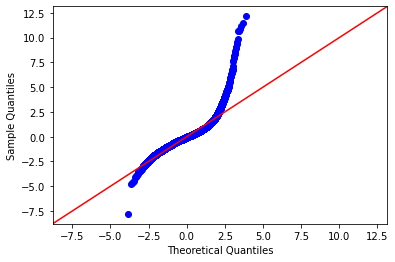

In [61]:
check_normality(model7)

The model is heteroskedastic, p = 0.0.


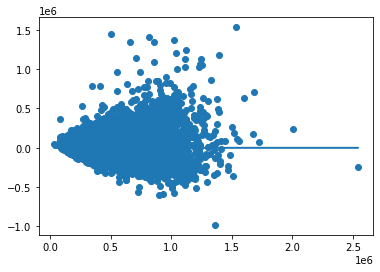

In [62]:
check_homoscedasticity(cleaned_data, x_cols_7, model7) 

In [63]:
x_cols_8 = x_cols_7.copy()
x_cols_8.remove("floors")
model8 = regression(x_cols_8, outcome, cleaned_data)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     509.6
Date:                Fri, 28 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:06:48   Log-Likelihood:            -2.2901e+05
No. Observations:               17392   AIC:                         4.582e+05
Df Residuals:                   17295   BIC:                         4.590e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -8.291e+04   5.19e+04     -1.596      0.110   -1.85e+05    1.89e+04
C(waterfront)[T.1.0]  5.752e+05   2.11e+04     27.321      0.000    5.34e+05    6.16e+05
C(condition)[T.2]     7.231e+04   3.33e+04      2.175      0.030    7131.172    1.37e+05
C(condition)[T.3]     1.095e+05   3.12e+04      3.510      0.000    4.83e+04    1.71e+05
C(condition)[T.4]     1.324e+05   3.12e+04      4.244      0.000    7.13e+04    1.94e+05
C(condition)[T.5]      1.86e+05   3.13e+04      5.939      0.000    1.25e+05    2.47e+05
C(grade)[T.5]         3.855e+04   4.16e+04      0.926      0.355   -4.31e+04     1.2e+05
C(grade)[T.6]         7.125e+04   4.05e+04      1.759      0.079   -8165.845    1.51e+05
C(grade)[T.7]         1.546e+05   4.05e+04      3.819      0.000    7.52e+04    2.34e+05
C(grade)[T.8]         2.732e+05   4.05e+04      6.739      0.000    1.94e+05    3.53e+05
C(grade)[T.9]         4.728e+05   4.06e+04     11.633      0.000    3.93e+05    5.52e+05
C(grade)[T.10]        6.273e+05    4.1e+04     15.310      0.000    5.47e+05    7.08e+05
C(grade)[T.11]        8.825e+05   4.45e+04     19.840      0.000    7.95e+05     9.7e+05
C(grade)[T.12]        1.617e+06   9.94e+04     16.264      0.000    1.42e+06    1.81e+06
C(zipcode)[T.98002]   1622.1712   1.21e+04      0.134      0.893    -2.2e+04    2.53e+04
C(zipcode)[T.98003]  -1.543e+04   1.11e+04     -1.395      0.163   -3.71e+04    6252.494
C(zipcode)[T.98004]   5.921e+05    1.2e+04     49.254      0.000    5.69e+05    6.16e+05
C(zipcode)[T.98005]     3.1e+05   1.43e+04     21.691      0.000    2.82e+05    3.38e+05
C(zipcode)[T.98006]   2.526e+05   1.03e+04     24.465      0.000    2.32e+05    2.73e+05
C(zipcode)[T.98007]   2.127e+05   1.39e+04     15.345      0.000    1.86e+05     2.4e+05
C(zipcode)[T.98008]   2.275e+05   1.11e+04     20.418      0.000    2.06e+05    2.49e+05
C(zipcode)[T.98010]   7.834e+04   2.05e+04      3.829      0.000    3.82e+04    1.18e+05
C(zipcode)[T.98011]   1.402e+05   1.24e+04     11.350      0.000    1.16e+05    1.64e+05
C(zipcode)[T.98014]   9.192e+04    2.2e+04      4.187      0.000    4.89e+04    1.35e+05
C(zipcode)[T.98019]   1.312e+05   1.33e+04      9.837      0.000    1.05e+05    1.57e+05
C(zipcode)[T.98022]  -1123.5136   1.32e+04     -0.085      0.932   -2.69e+04    2.47e+04
C(zipcode)[T.98023]  -4.098e+04   9697.751     -4.226      0.000      -6e+04    -2.2e+04
C(zipcode)[T.98024]   1.088e+05   2.76e+04      3.935      0.000    5.46e+04    1.63e+05
C(zipcode)[T.98027]   1.873e+05   1.14e+04     16.420      0.000    1.65e+05     2.1e+05
C(zipcode)[T.98028]   1.252e+05   1.11e+04     11.230      0.000    1.03e+05    1.47e+05
C(zipcode)[T.98029]   1.886e+05   1.08e+04     17.454      0.000    1.67e+05     2.1e+05
C(zipcode)[T.98030]   3534.5860   1.12e+04      0.315    

In [64]:
calc_variance_inflation_factor(cleaned_data, x_cols_8)         

('waterfront', 3897232.397370481)


The residuals are not normally distributed, p = 0.0.


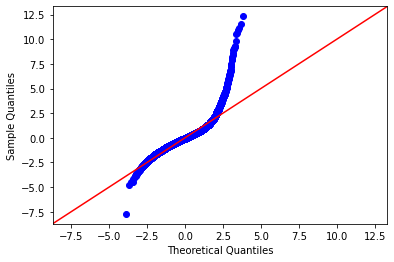

In [65]:
check_normality(model8)

The model is heteroskedastic, p = 0.0.


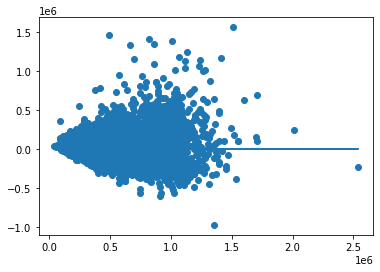

In [66]:
check_homoscedasticity(cleaned_data, x_cols_8, model8) 

In [67]:
x_cols_9 = x_cols_8.copy()
x_cols_9.remove("house_age")
model9 = regression(x_cols_9, outcome, cleaned_data)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     504.0
Date:                Fri, 28 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:06:50   Log-Likelihood:            -2.2914e+05
No. Observations:               17392   AIC:                         4.585e+05
Df Residuals:                   17296   BIC:                         4.592e+05
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -7787.2576   5.22e+04     -0.149      0.881    -1.1e+05    9.44e+04
C(waterfront)[T.1.0]  5.818e+05   2.12e+04     27.420      0.000     5.4e+05    6.23e+05
C(condition)[T.2]     6.803e+04   3.35e+04      2.030      0.042    2337.851    1.34e+05
C(condition)[T.3]     9.475e+04   3.14e+04      3.015      0.003    3.31e+04    1.56e+05
C(condition)[T.4]     1.314e+05   3.15e+04      4.176      0.000    6.97e+04    1.93e+05
C(condition)[T.5]     1.902e+05   3.16e+04      6.023      0.000    1.28e+05    2.52e+05
C(grade)[T.5]          2.71e+04    4.2e+04      0.646      0.518   -5.51e+04    1.09e+05
C(grade)[T.6]         4.887e+04   4.08e+04      1.197      0.231   -3.11e+04    1.29e+05
C(grade)[T.7]         1.178e+05   4.07e+04      2.893      0.004     3.8e+04    1.98e+05
C(grade)[T.8]          2.24e+05   4.08e+04      5.497      0.000    1.44e+05    3.04e+05
C(grade)[T.9]         4.186e+05   4.08e+04     10.250      0.000    3.39e+05    4.99e+05
C(grade)[T.10]        5.727e+05   4.12e+04     13.913      0.000    4.92e+05    6.53e+05
C(grade)[T.11]        8.232e+05   4.47e+04     18.418      0.000    7.36e+05    9.11e+05
C(grade)[T.12]        1.535e+06      1e+05     15.331      0.000    1.34e+06    1.73e+06
C(zipcode)[T.98002]   2277.5623   1.22e+04      0.187      0.851   -2.16e+04    2.61e+04
C(zipcode)[T.98003]  -8509.5340   1.11e+04     -0.764      0.445   -3.03e+04    1.33e+04
C(zipcode)[T.98004]   6.082e+05   1.21e+04     50.352      0.000    5.84e+05    6.32e+05
C(zipcode)[T.98005]   3.252e+05   1.44e+04     22.621      0.000    2.97e+05    3.53e+05
C(zipcode)[T.98006]    2.63e+05   1.04e+04     25.317      0.000    2.43e+05    2.83e+05
C(zipcode)[T.98007]   2.245e+05    1.4e+04     16.094      0.000    1.97e+05    2.52e+05
C(zipcode)[T.98008]   2.405e+05   1.12e+04     21.470      0.000    2.19e+05    2.63e+05
C(zipcode)[T.98010]   7.279e+04   2.06e+04      3.530      0.000    3.24e+04    1.13e+05
C(zipcode)[T.98011]   1.463e+05   1.24e+04     11.757      0.000    1.22e+05    1.71e+05
C(zipcode)[T.98014]   9.391e+04   2.21e+04      4.243      0.000    5.05e+04    1.37e+05
C(zipcode)[T.98019]   1.282e+05   1.34e+04      9.540      0.000    1.02e+05    1.55e+05
C(zipcode)[T.98022]    893.9368   1.33e+04      0.067      0.946   -2.51e+04    2.69e+04
C(zipcode)[T.98023]  -3.653e+04   9771.414     -3.739      0.000   -5.57e+04   -1.74e+04
C(zipcode)[T.98024]   1.234e+05   2.78e+04      4.430      0.000    6.88e+04    1.78e+05
C(zipcode)[T.98027]   1.892e+05   1.15e+04     16.452      0.000    1.67e+05    2.12e+05
C(zipcode)[T.98028]   1.326e+05   1.12e+04     11.816      0.000    1.11e+05    1.55e+05
C(zipcode)[T.98029]   1.901e+05   1.09e+04     17.451      0.000    1.69e+05    2.11e+05
C(zipcode)[T.98030]   3609.1783   1.13e+04      0.319    

In [68]:
calc_variance_inflation_factor(cleaned_data, x_cols_9)         

('waterfront', 3530606.9393117707)


The residuals are not normally distributed, p = 0.0.


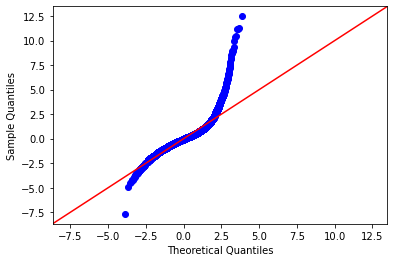

In [69]:
check_normality(model9)

The model is heteroskedastic, p = 0.0.


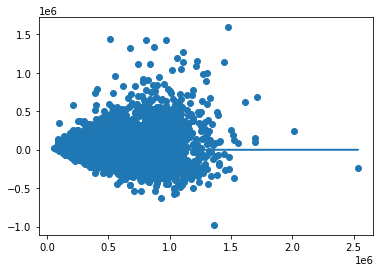

In [70]:
check_homoscedasticity(cleaned_data, x_cols_9, model9) 

In [71]:
x_cols_10 = x_cols_9.copy()
x_cols_10.remove("waterfront_1")
model10 = regression(x_cols_10, outcome, cleaned_data)

ValueError: list.remove(x): x not in list

In [ ]:
calc_variance_inflation_factor(cleaned_data, x_cols_10)         

In [ ]:
check_normality(model10)

In [ ]:
check_homoscedasticity(cleaned_data, x_cols_10, model10) 